# Predictive performance on 4 datasets

In [1]:
%matplotlib inline

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

from kseval.plotting import sigconf_settings
from kseval.utils import data_path

In [3]:
sigconf_settings()

Sigconf settings loaded!


In [4]:
datasets = ["tennis-perf", "basketball-perf", "football-perf", "chess-small-perf"]
data = dict()

for name in datasets:
    with open(data_path("fig/{}.json".format(name))) as f:
        data[name] = json.load(f)

In [5]:
def plot(name, ax, ours, title):
    # Set up some variables.
    models = ["constant", "elo", "trueskill", ours]
    labels = ["Cst", "Elo", "TS", "Ours"]
    hl_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
    idx = np.arange(len(models))
    vals = (np.array([data[name][m]["avg_ll"] for m in models])
            - data[name]["random"]["avg_ll"])
    # Bar plot.
    bars = ax.bar(idx, vals, width=0.6)
    bars[3].set_color(hl_color)
    # Axes settings.
    ax.xaxis.tick_top()
    ax.set_xticks(idx)
    ax.set_xticklabels(labels, y=0.95)
    ax.set_title(title, y=1.15)

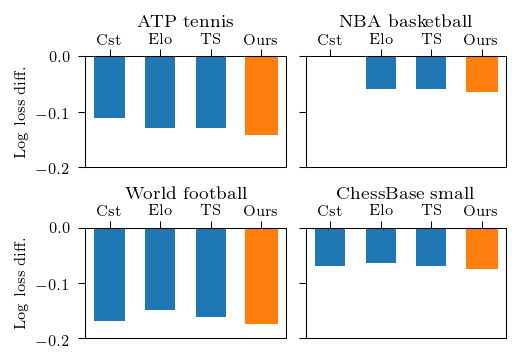

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3.6, 2.5), sharey=True)
axs[0,0].set_ylim(ymax=0.0, ymin=-0.2)

axs[0,0].set_ylabel("Log loss diff.")
axs[1,0].set_ylabel("Log loss diff.")

plot("tennis-perf", axs[0,0], ours="affine-wiener", title="ATP tennis")
plot("basketball-perf", axs[0,1], ours="matern12", title="NBA basketball")
plot("football-perf", axs[1,0], ours="matern12", title="World football")
plot("chess-small-perf", axs[1,1], ours="wiener", title="ChessBase small")

fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.55)

fig.savefig("improvement.pdf", bbox_inches="tight")